In [ ]:
# A tiny sentiment analyzer!

positive_words = ["love", "amazing", "great", "happy", "good", "fantastic"]
negative_words = ["hate", "bad", "terrible", "awful", "worst", "horrible"]

def simple_sentiment(text):
    text = text.lower()  # lowercase the text
    score = 0
    for word in text.split():
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1

    if score > 0:
        return "Positive 😊"
    elif score < 0:
        return "Negative 😡"
    else:
        return "Neutral 😐"

# Example
review = "I love this phone but the battery life is terrible"
print(simple_sentiment(review))


Neutral 😐


In [ ]:
!pip install textblob



In [ ]:
from textblob import download_corpora
download_corpora.download_all()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


**Using Textblob**

In [ ]:
from textblob import TextBlob

# Your text
text = "I love this phone but the battery life is terrible."

# Create a TextBlob object
blob = TextBlob(text)

# Get sentiment
print(blob.sentiment)


Sentiment(polarity=-0.25, subjectivity=0.8)


**using Vader  (good for short texts like tweets)**

In [ ]:
pip install vaderSentiment


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

text = "I love this phone but the battery life is terrible."

# Analyze
score = analyzer.polarity_scores(text)

print(score)


{'neg': 0.281, 'neu': 0.542, 'pos': 0.176, 'compound': -0.3716}


In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Example texts
texts = [
    "I love this phone! 😍 It's soooo good!",
    "Worst service ever. I'm never coming back! 🤬",
    "It's okay, not great, not terrible.",
]

# Analyze each text
for text in texts:
    score = sia.polarity_scores(text)
    print(f"\nText: {text}")
    print(f"Sentiment Scores: {score}")

    # Quick Interpretation
    if score['compound'] >= 0.05:
        print("Overall Sentiment: Positive ✅")
    elif score['compound'] <= -0.05:
        print("Overall Sentiment: Negative ❌")
    else:
        print("Overall Sentiment: Neutral 😐")



Text: I love this phone! 😍 It's soooo good!
Sentiment Scores: {'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.8264}
Overall Sentiment: Positive ✅

Text: Worst service ever. I'm never coming back! 🤬
Sentiment Scores: {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.6588}
Overall Sentiment: Negative ❌

Text: It's okay, not great, not terrible.
Sentiment Scores: {'neg': 0.526, 'neu': 0.29, 'pos': 0.184, 'compound': -0.549}
Overall Sentiment: Negative ❌


**Analyse a full csv file**

In [ ]:
pip install nltk pandas


**Create a sample csv file**

In [ ]:
import pandas as pd

# Sample data (e.g., reviews or tweets)
data = {
    'text': [
        "I love this product! Best thing I've ever bought 😍",
        "Terrible experience, I will never buy from here again 😡",
        "It's okay, but nothing special.",
        "The service was amazing! So happy 😊",
        "I hate waiting in long lines. This was awful! 😤"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save it as a CSV file
df.to_csv('sample_reviews.csv', index=False)


**Load and analyse CSV file**

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Load your CSV file
df = pd.read_csv('sample_reviews.csv')

# Function to analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis on the 'text' column
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Show the results
print(df)


                                                text sentiment
0  I love this product! Best thing I've ever boug...  Positive
1  Terrible experience, I will never buy from her...  Negative
2                    It's okay, but nothing special.  Negative
3                The service was amazing! So happy 😊  Positive
4    I hate waiting in long lines. This was awful! 😤  Negative


In [ ]:
df.to_csv('sentiment_analysis_results.csv', index=False)


**visualization**


<ipython-input-15-d4d3f36c5840>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


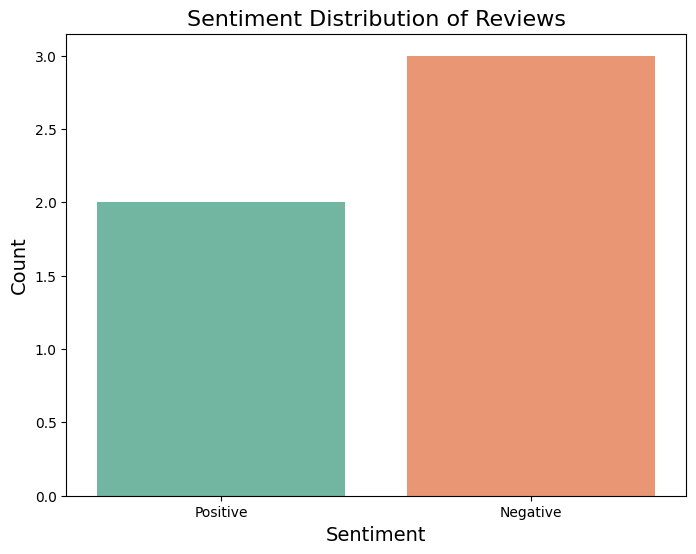

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Load your CSV file
df = pd.read_csv('sample_reviews.csv')

# Function to analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis on the 'text' column
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()


**Text Preprocessing for Sentiment Analysis**

1. **Tokenization** **bold text**

Tokenization is the process of splitting text into smaller chunks, called "tokens."

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "I love this product!"
tokens = word_tokenize(text)
print(tokens)  # Output: ['I', 'love', 'this', 'product', '!']


['I', 'love', 'this', 'product', '!']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2. **Lowercasing**

In [ ]:
text = "I LOVE this product!"
text = text.lower()
print(text)  # Output: "i love this product!"


i love this product!


**3. Removing Stop Words**
Stop words are common words (such as "the", "is", "in", "and") that don’t contribute much meaning in most contexts. Removing them can help reduce the noise in your data.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
tokens = ['I', 'love', 'this', 'product']
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)  # Output: ['love', 'product']


['love', 'product']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**4. Removing Special Characters & Punctuation**
Cleaning up special characters (e.g., punctuation, symbols) can help the model focus on important words.

In [ ]:
import re

text = "I love this product!!! #amazing"
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
print(text)  # Output: "I love this product amazing"


I love this product amazing


**5. Stemming and Lemmatization**
Both stemming and lemmatization reduce words to their root form, but they differ in their approach:

**Stemming:** Trims words to their root form, often resulting in a non-dictionary word (e.g., "running" → "run").

**Lemmatization:** Reduces words to their base form using a dictionary-based approach (e.g., "running" → "run", "better" → "good").


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
word = "running"
lemmatized_word = lemmatizer.lemmatize(word, pos='v')  # 'v' for verb
print(lemmatized_word)  # Output: "run"


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


run


**6. Handling Emojis and Emoticons**
Emojis and emoticons (e.g., 😊, 😢, 😍) can convey sentiment. You might want to remove them or convert them to sentiment labels (e.g., "😊" → "happy").

In [ ]:
pip install emoji

In [ ]:
import emoji

text = "I love this product! 😊"
clean_text = emoji.replace_emoji(text, replace="")
print(clean_text)  # Output: "I love this product!"


I love this product! 


**7. Text Normalization**
Text normalization includes handling variations such as:

**Spelling Corrections**:Correcting common misspellings (e.g., "definately" → "definitely").

**Expanding Abbreviations**: Converting abbreviations or slang to their full form (e.g., "u" → "you", "b4" → "before").

In [ ]:
from textblob import TextBlob

text = "I am definetly going to buy this!"
blob = TextBlob(text)
corrected_text = blob.correct()
print(corrected_text)  # Output: "I am definitely going to buy this!"


I am definitely going to buy this!


**8. Removing Non-Alphanumeric Characters**
Sometimes, you may want to remove everything except alphanumeric characters.

In [ ]:
text = "I love this product!!! #amazing"
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
print(text)  # Output: "I love this product amazing"


I love this product amazing


**Feature Engineering for Sentiment Analysis**

Feature engineering is the process of transforming raw data into meaningful input features that will help machine learning models make predictions. For text data, this involves converting text into numerical representations.

**1. Bag of Words (BoW)**

The Bag of Words (BoW) model represents text data in a way that disregards grammar and word order but keeps track of the frequency of words. The idea is to create a "bag" (set) of words and count how often each word appears in the document.

Example:

Text 1: "I love this product"

Text 2: "This product is great"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = ["I love this product", "This product is great"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

print(vectorizer.get_feature_names_out())  # ['great', 'is', 'love', 'product', 'this']
print(X.toarray())  # Document-term matrix


['great' 'is' 'love' 'product' 'this']
[[0 0 1 1 1]
 [1 1 0 1 1]]


**2. Term Frequency-Inverse Document Frequency (TF-IDF)**

While BoW counts the frequency of words, TF-IDF improves on this by considering how important a word is across all documents. It helps to reduce the weight of words that are common across all documents (such as "the", "is", "and") and gives higher weight to less frequent but more meaningful words.

TF (Term Frequency): Measures how often a word appears in a document.

TF
(
𝑡
,
𝑑
)
=
Number of times term t appears in document d
Total number of terms in document d
TF(t,d)=
Total number of terms in document d
Number of times term t appears in document d
​

IDF (Inverse Document Frequency): Measures the importance of a word in the entire dataset.

IDF
(
𝑡
)
=
log
⁡
(
Total number of documents
Number of documents containing term t
)
IDF(t)=log(
Number of documents containing term t
Total number of documents
​
 )
The TF-IDF score is the product of these two metrics:

TF-IDF
(
𝑡
,
𝑑
)
=
TF
(
𝑡
,
𝑑
)
×
IDF
(
𝑡
)
TF-IDF(t,d)=TF(t,d)×IDF(t)
Advantages: Takes word importance into account and is less sensitive to commonly occurring words.

Disadvantages: Still ignores word order and context.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = ["I love this product", "This product is great"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

print(vectorizer.get_feature_names_out())  # ['great', 'is', 'love', 'product', 'this']
print(X.toarray())  # TF-IDF matrix


['great' 'is' 'love' 'product' 'this']
[[0.         0.         0.70490949 0.50154891 0.50154891]
 [0.57615236 0.57615236 0.         0.40993715 0.40993715]]


**3. Word Embeddings**

Word Embeddings are a more advanced technique, where words are represented as dense vectors in a high-dimensional space. Unlike BoW or TF-IDF, embeddings capture semantic meaning by grouping similar words together in the vector space. For example, "king" and "queen" would be closer to each other in vector space than "king" and "car".

**Popular Word Embedding models include:**

**Word2Vec**: Uses neural networks to learn vector representations of words based on their context in a corpus of text.

**GloVe**: A matrix factorization method that learns word vectors based on the global statistical information of a corpus.

**FastText**: Similar to Word2Vec but also takes sub-word information into account.

**Advantages**: Captures semantic meaning and relationships between words.

**Disadvantages**: Requires a lot of data to train, and the learned vectors may not always work well for small datasets.

**Building a Sentiment Analysis Model**

In [ ]:
from sklearn.model_selection import train_test_split

# Example data (You can load your dataset here)
texts = ["I love this product!", "Worst purchase I made.", "It's okay, not great.", "Amazing quality!", "Very bad, would not recommend."]
labels = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

print(X_train)
print(y_train)


['Very bad, would not recommend.', "It's okay, not great.", 'I love this product!', 'Amazing quality!']
['Negative', 'Neutral', 'Positive', 'Positive']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical features (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape)  # Check the shape of the resulting feature matrix


(4, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# New text to classify
new_text = ["I am very happy with my purchase!", "The product broke on the first day."]

# Transform the text using the same TF-IDF vectorizer
new_text_tfidf = vectorizer.transform(new_text)

# Predict the sentiment for the new text
predictions = model.predict(new_text_tfidf)
print(predictions)  # Output: ['Positive', 'Negative']


['Positive' 'Positive']


**Deep Learning Models for Sentiment Analysis**

**1. LSTM (Long Short-Term Memory)**

LSTM is a type of Recurrent Neural Network (RNN) designed to address the vanishing gradient problem in traditional RNNs. It's particularly effective for processing sequential data like text, as it can capture long-term dependencies.

In [ ]:
pip install tensorflow


In [ ]:
!pip install opencv-python --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Example data (you should use your own dataset here)
texts = ["I love this product!", "Worst purchase I made.", "It's okay, not great.", "Amazing quality!", "Very bad, would not recommend."]
labels = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']

# Tokenizing the texts
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, padding='post')

# Encoding the labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
score, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.7500 - loss: 1.0927 - val_accuracy: 0.0000e+00 - val_loss: 1.1111
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 1.0856 - val_accuracy: 0.0000e+00 - val_loss: 1.1184
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7500 - loss: 1.0711 - val_accuracy: 0.0000e+00 - val_loss: 1.1259
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7500 - loss: 1.0590 - val_accuracy: 0.0000e+00 - val_loss: 1.1338
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 1.0000 - loss: 1.0439 - val_accuracy: 0.0000e+00 - val_loss: 1.1422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0000e+00 - loss: 1.1422
Test Accuracy: 0.0


**2. BERT (Bidirectional Encoder Representations from Transformers)**

BERT is a transformer-based model that has revolutionized NLP. Unlike traditional models, BERT is bidirectional, meaning it reads the text in both directions (left-to-right and right-to-left). This allows BERT to better capture context and semantic meaning in sentences.

In [ ]:
!pip install transformers
!pip install torch


In [ ]:
from transformers import pipeline

# Load a fill-mask pipeline with BERT
unmasker = pipeline('fill-mask', model='bert-base-uncased')

# Input sentence with a [MASK] token
sentence = "The capital of France is [MASK]."

# Run prediction
predictions = unmasker(sentence)

# Print top 5 predictions
for pred in predictions:
    print(f"Predicted word: {pred['token_str']} with score: {pred['score']:.4f}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Predicted word: paris with score: 0.4168
Predicted word: lille with score: 0.0714
Predicted word: lyon with score: 0.0634
Predicted word: marseille with score: 0.0444
Predicted word: tours with score: 0.0303


In [ ]:
from transformers import pipeline

# Load a sentiment-analysis pipeline
classifier = pipeline('sentiment-analysis')

# Input sentences
sentences = [
    "I love using BERT! It's amazing!",
    "This movie was terrible and a waste of time."
]

# Run classification
results = classifier(sentences)

# Print results
for sentence, result in zip(sentences, results):
    print(f"Sentence: '{sentence}'")
    print(f"Label: {result['label']}, Confidence: {result['score']:.4f}")
    print()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Sentence: 'I love using BERT! It's amazing!'
Label: POSITIVE, Confidence: 0.9999

Sentence: 'This movie was terrible and a waste of time.'
Label: NEGATIVE, Confidence: 0.9998



**sentiment analysis with machine learning**

In [ ]:
import pandas as pd

# Sample dataset of movie reviews
data = {
    "review": [
        "I love this movie, it's fantastic!",
        "Worst movie ever, waste of time.",
        "It was an okay movie.",
        "Really great! I enjoyed it.",
        "Horrible, absolutely horrible."
    ],
    "sentiment": [1, 0, 1, 1, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)


**Text Representation**

We’ll use TF-IDF for feature extraction here, but you can switch it to BoW or Word2Vec depending on your preference.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Convert text into numerical vectors
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']


**Train a Machine Learning Model**

Now, we'll train a simple Logistic Regression model. We could also use Naive Bayes, SVM, etc., but Logistic Regression is a great starting point for sentiment classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


**Evaluate the Model**

Now we evaluate the model using classification metrics like accuracy, precision, recall, F1-score, and the confusion matrix.

In [ ]:
# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Visualize the Results (Optional)**

You can visualize the confusion matrix using libraries like seaborn to get more insights into model performance.

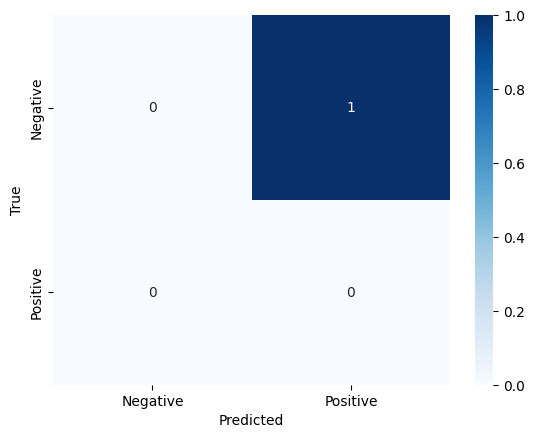

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
